# Movie Recommendation


In this notebook we are going to implement content based recommendation system.

## Importing libraries

In [89]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

## Loading data files

### The data consists of 105339 ratings applied over 10329 movies.

The movies.csv dataset contains three columns:

 - movieId: the ID of the movie
 - title: movies title
 - genres: movies genres 
 
The ratings.csv dataset contains four columns:

 - userId: the ID of the user who rated the movie.
 - movieId: the ID of the movie
 - ratings: ratings given by each user (from 0 to 5)
 - Timstamp: The time the movie was rated. 
 

In [90]:
# reading the datasets
#import data from kaggle
movies=pd.read_csv('movies.csv')
ratings=pd.read_csv('ratings.csv')

In [91]:
#for i in range(0,5):
print(movies)
print(ratings)

       movieId                                title  \
0            1                     Toy Story (1995)   
1            2                       Jumanji (1995)   
2            3              Grumpier Old Men (1995)   
3            4             Waiting to Exhale (1995)   
4            5   Father of the Bride Part II (1995)   
...        ...                                  ...   
10324   146684        Cosmic Scrat-tastrophe (2015)   
10325   146878           Le Grand Restaurant (1966)   
10326   148238       A Very Murray Christmas (2015)   
10327   148626                 The Big Short (2015)   
10328   149532  Marco Polo: One Hundred Eyes (2015)   

                                            genres  
0      Adventure|Animation|Children|Comedy|Fantasy  
1                       Adventure|Children|Fantasy  
2                                   Comedy|Romance  
3                             Comedy|Drama|Romance  
4                                           Comedy  
...                  

In [92]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10329 entries, 0 to 10328
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  10329 non-null  int64 
 1   title    10329 non-null  object
 2   genres   10329 non-null  object
dtypes: int64(1), object(2)
memory usage: 242.2+ KB


In [93]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105339 entries, 0 to 105338
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     105339 non-null  int64  
 1   movieId    105339 non-null  int64  
 2   rating     105339 non-null  float64
 3   timestamp  105339 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.2 MB


In [94]:
movies.shape

(10329, 3)

In [95]:
ratings.shape

(105339, 4)

In [96]:
movies.describe()

,movieId
count,10329.000000
mean,31924.282893
std,37734.741149
min,1.000000
25%,3240.000000
50%,7088.000000
75%,59900.000000
max,149532.000000


In [97]:
ratings.describe()

,userId,movieId,rating,timestamp
count,105339.000000,105339.000000,105339.000000,1.053390e+05
mean,364.924539,13381.312477,3.516850,1.130424e+09
std,197.486905,26170.456869,1.044872,1.802660e+08
min,1.000000,1.000000,0.500000,8.285650e+08
25%,192.000000,1073.000000,3.000000,9.711008e+08
50%,383.000000,2497.000000,3.500000,1.115154e+09
75%,557.000000,5991.000000,4.000000,1.275496e+09
max,668.000000,149532.000000,5.000000,1.452405e+09


 From the above table we can conclue that
 
 - The average rating is 3.5 and minimum and maximum rating is 0.5 and 5 respectively. 
 - There are 668 user who has given their ratings for 149532 movies.


In [98]:
print(movies['genres'][0])
print(mov)

Adventure|Animation|Children|Comedy|Fantasy
0        Adventure|Animation|Children|Comedy|Fantasy
1                         Adventure|Children|Fantasy
2                                     Comedy|Romance
3                               Comedy|Drama|Romance
4                                             Comedy
                            ...                     
10324                      Animation|Children|Comedy
10325                                         Comedy
10326                                         Comedy
10327                                          Drama
10328                             (no genres listed)
Name: genres, Length: 10329, dtype: object


In [99]:
genres=" "
j = 0
for genre in movies.genres:
      x=genre.split('|')
      for i in x:
        i = str(i)
        genres = genres + " " + i 
      j=j+1
movie_title=" "
for title in movies.title:
    movie_title += title
   

## Data Visualization

In [100]:
wordcloud_genre_data=WordCloud(width=1500,height=800,background_color='black',collocations = False,min_font_size=2
                    ,min_word_length=3).generate(genres)
wordcloud_title_data=WordCloud(width=1500,height=800,collocations = False,background_color='cyan',min_font_size=2
                    ,min_word_length=3).generate(movie_title)

print(wordcloud_genre_data.words_)
print(wordcloud_title_data.words_)


{'Drama': 1.0, 'Comedy': 0.6733716475095786, 'Thriller': 0.4189655172413793, 'Romance': 0.3425287356321839, 'Action': 0.33275862068965517, 'Crime': 0.27586206896551724, 'Adventure': 0.22298850574712645, 'Horror': 0.19176245210727969, 'Sci': 0.16475095785440613, 'Mystery': 0.12931034482758622, 'Fantasy': 0.12835249042145594, 'Children': 0.10344827586206896, 'War': 0.09636015325670498, 'Documentary': 0.07950191570881227, 'Musical': 0.07835249042145594, 'Animation': 0.0768199233716475, 'Western': 0.045019157088122604, 'Film': 0.03735632183908046, 'Noir': 0.03735632183908046, 'IMAX': 0.029118773946360154, 'genres': 0.0013409961685823754, 'listed': 0.0013409961685823754}
{'Man': 1.0, 'Love': 0.5658536585365853, 'Night': 0.551219512195122, 'Day': 0.5463414634146342, 'Girl': 0.44878048780487806, 'Dead': 0.40487804878048783, 'Movie': 0.40487804878048783, 'Life': 0.40487804878048783, 'Last': 0.375609756097561, 'Story': 0.3463414634146341, 'Boy': 0.33658536585365856, 'American': 0.32195121951219

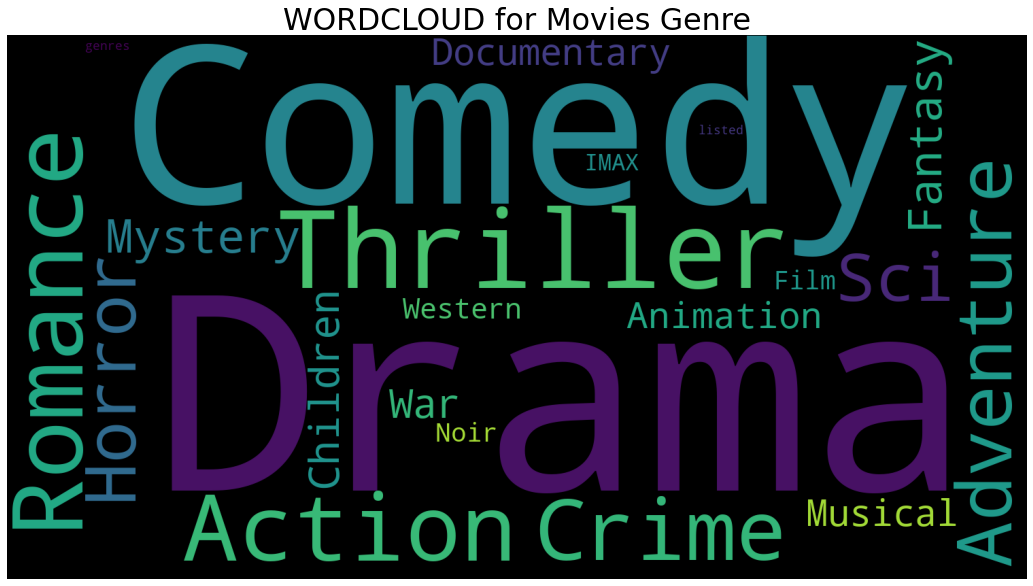

In [101]:
plt.figure(figsize=(30,10))
plt.axis('off')
plt.title('WORDCLOUD for Movies Genre',fontsize=30)
plt.imshow(wordcloud_genre_data)


In [102]:
df=pd.merge(ratings,movies, how='left',on='movieId')
df.head()

,userId,movieId,rating,timestamp,title,genres
0,1,16,4.0,1217897793,Casino (1995),Crime|Drama
1,1,24,1.5,1217895807,Powder (1995),Drama|Sci-Fi
2,1,32,4.0,1217896246,Twelve Monkeys (a.k.a. 12 Monkeys) (1995),Mystery|Sci-Fi|Thriller
3,1,47,4.0,1217896556,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,4.0,1217896523,"Usual Suspects, The (1995)",Crime|Mystery|Thriller


In [103]:
df1=df.groupby(['title'])[['rating']].sum()
print(df1.head())
high_rated=df1.nlargest(20,'rating')
high_rated.head()

                                         rating
title                                          
'71 (2014)                                  3.5
'Hellboy': The Seeds of Creation (2004)     3.0
'Round Midnight (1986)                      2.5
'Til There Was You (1997)                  12.0
'burbs, The (1989)                         62.5


,rating
title,
"Shawshank Redemption, The (1994)",1372.0
Pulp Fiction (1994),1352.0
Forrest Gump (1994),1287.0
"Silence of the Lambs, The (1991)",1216.5
Star Wars: Episode IV - A New Hope (1977),1143.5


<BarContainer object of 20 artists>

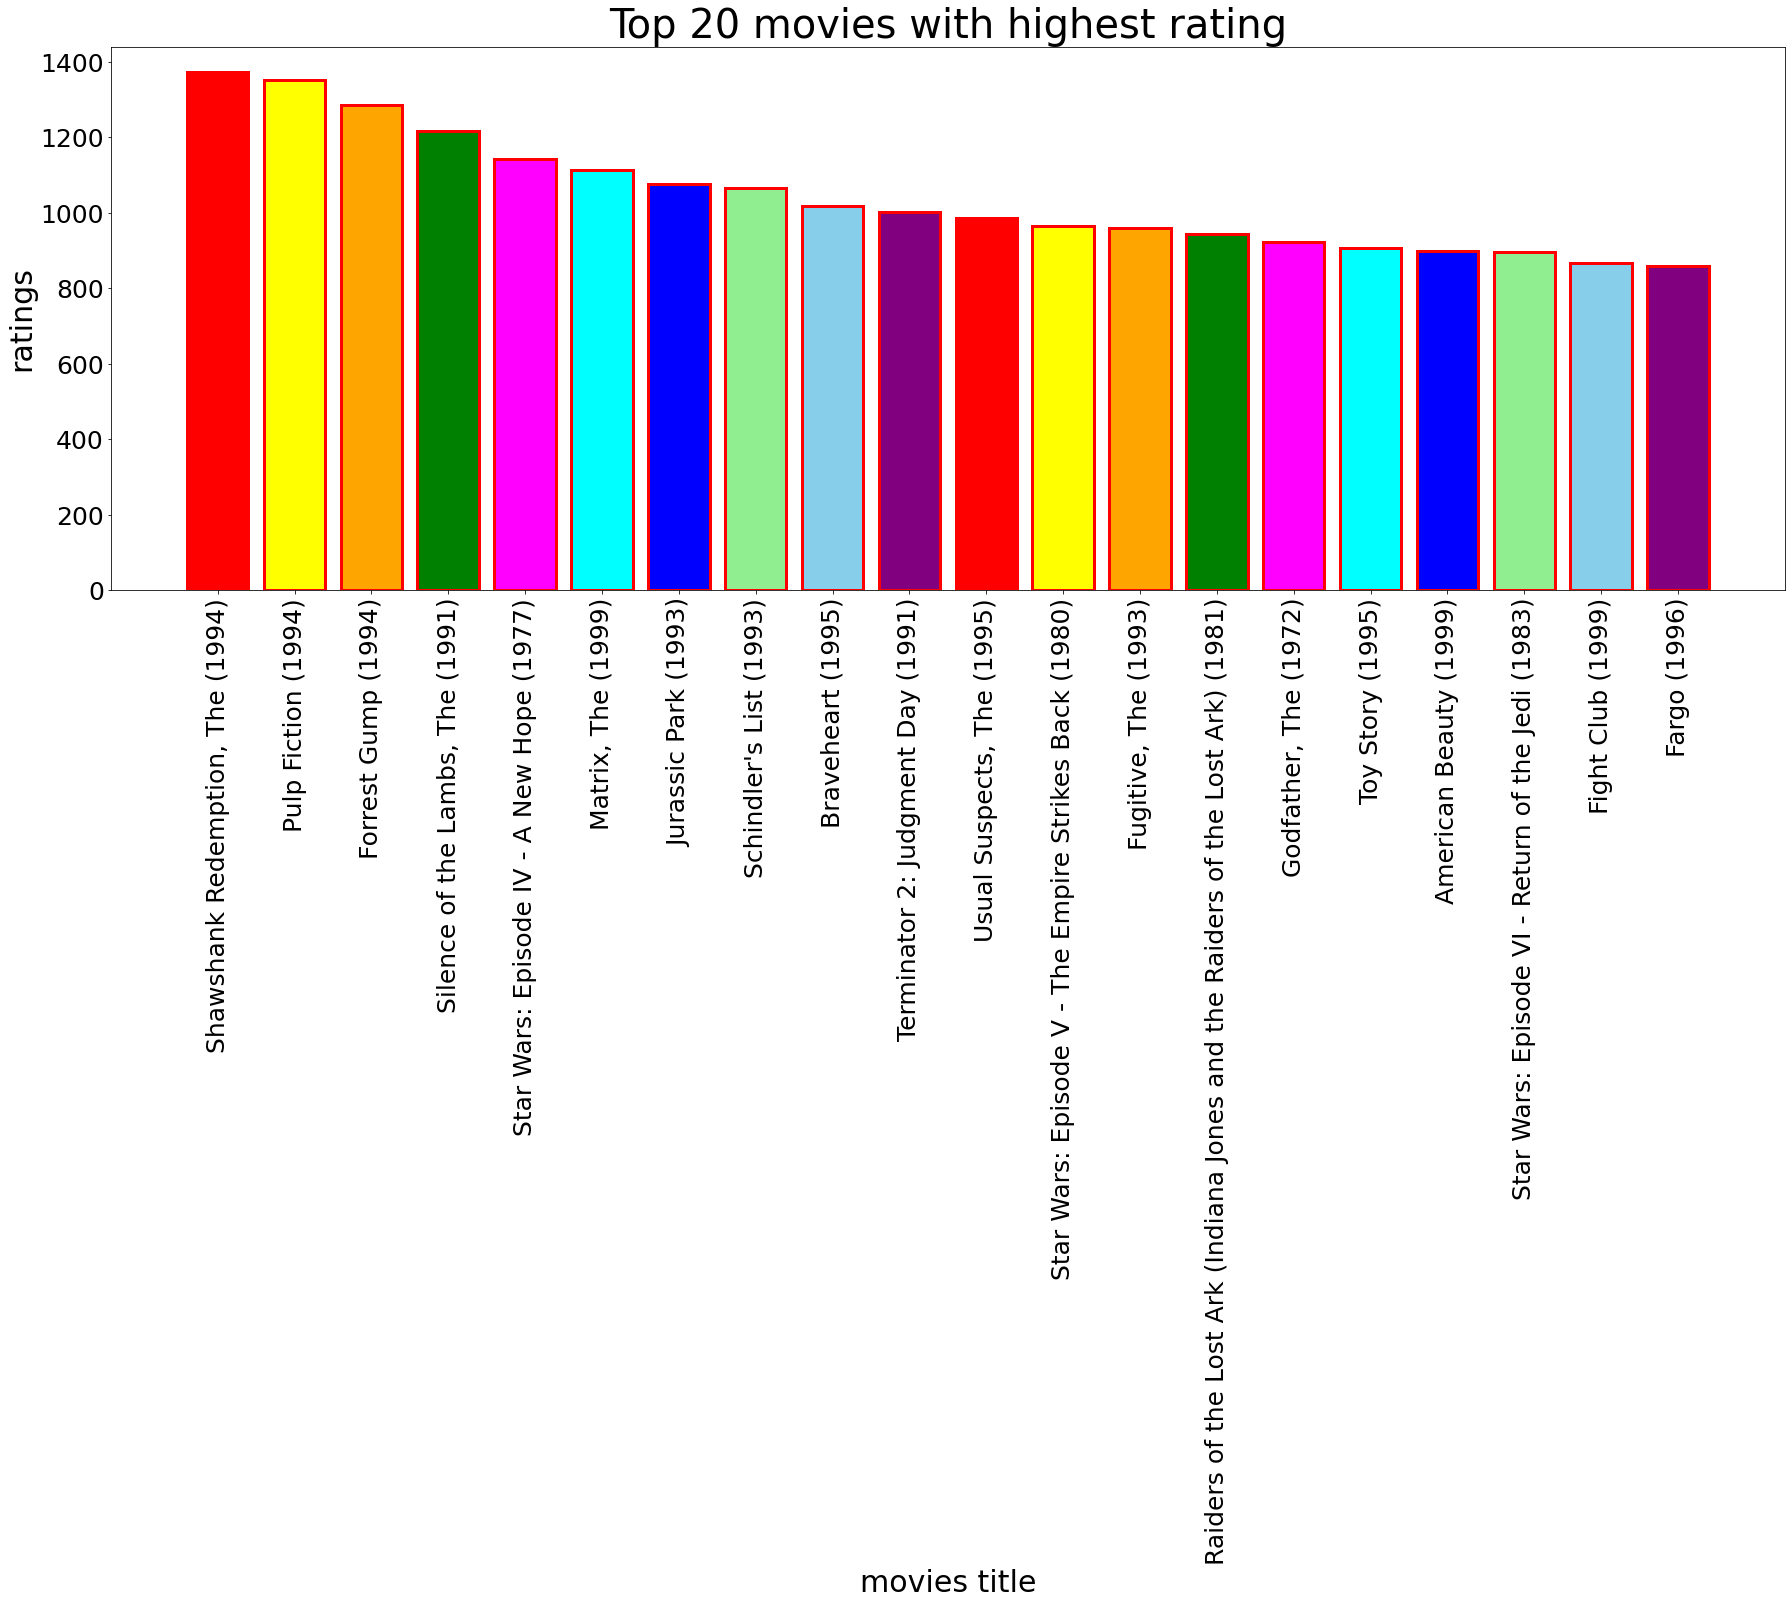

In [104]:
plt.figure(figsize=(30,10))
plt.title('Top 20 movies with highest rating',fontsize=40)
colors=['red','yellow','orange','green','magenta','cyan','blue','lightgreen','skyblue','purple']
plt.ylabel('ratings',fontsize=30)
plt.xticks(fontsize=25,rotation=90)
plt.xlabel('movies title',fontsize=30)
plt.yticks(fontsize=25)
plt.bar(high_rated.index,high_rated['rating'],linewidth=3,edgecolor='red',color=colors)


In [105]:
df2=df.groupby('title')[['rating']].count()
rating_count_20=df2.nlargest(20,'rating')
rating_count_20.head()

,rating
title,
Pulp Fiction (1994),325
Forrest Gump (1994),311
"Shawshank Redemption, The (1994)",308
Jurassic Park (1993),294
"Silence of the Lambs, The (1991)",290


<BarContainer object of 20 artists>

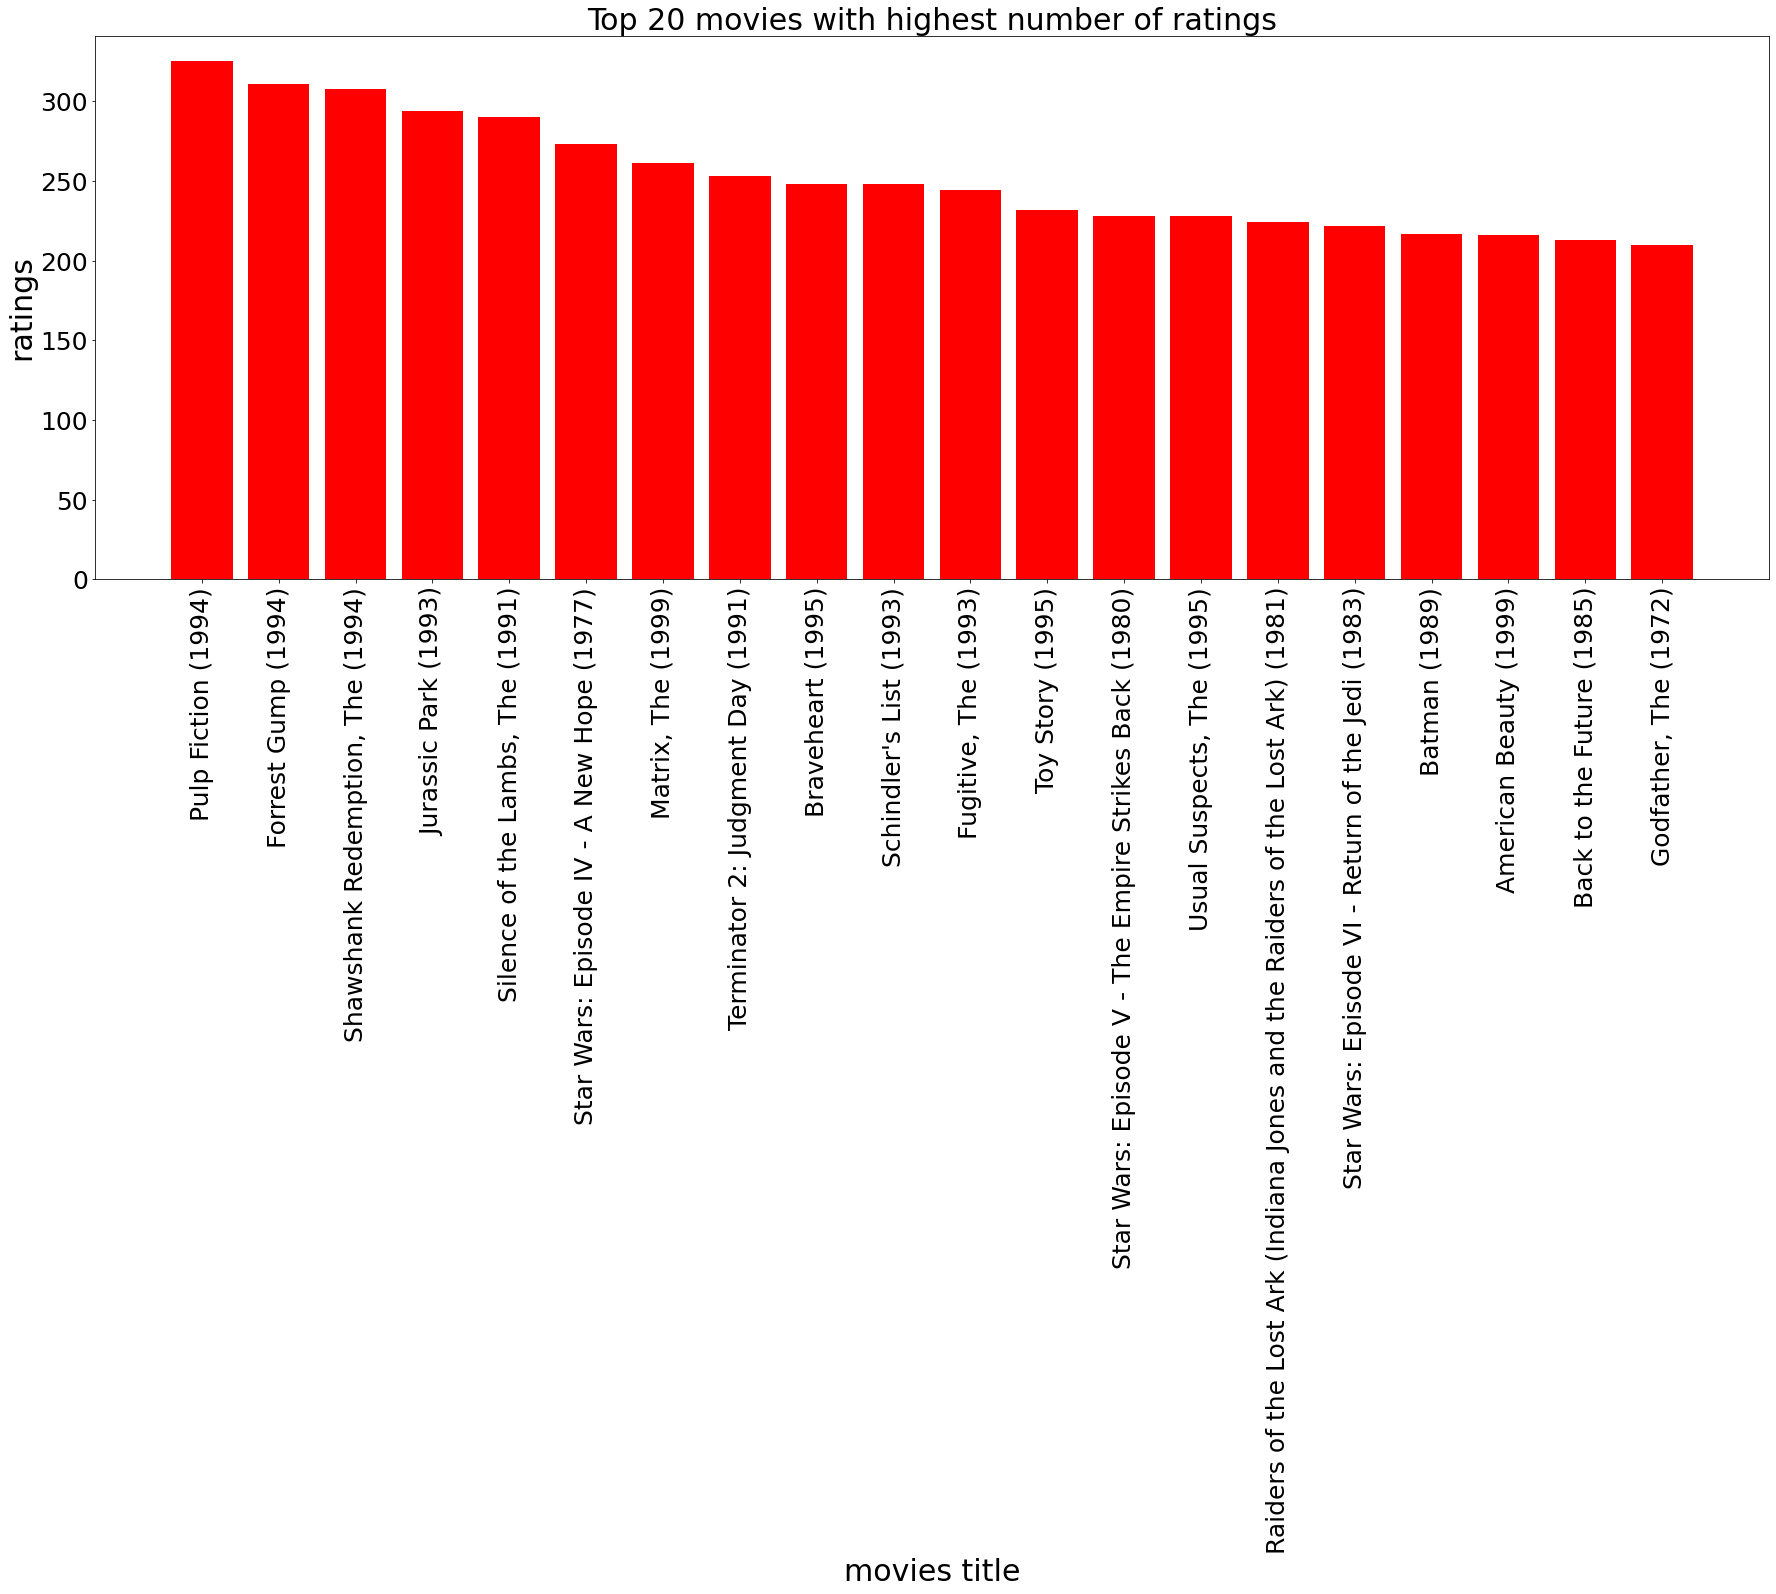

In [106]:
plt.figure(figsize=(30,10))
plt.title('Top 20 movies with highest number of ratings',fontsize=30)
plt.xticks(fontsize=25,rotation=90)
plt.yticks(fontsize=25)
plt.xlabel('movies title',fontsize=30)
plt.ylabel('ratings',fontsize=30)

plt.bar(rating_count_20.index,rating_count_20.rating,color='red')

In [107]:
cv=TfidfVectorizer()
tfidf_matrix=cv.fit_transform(movies['genres'])
print(movies['genres'][1])
print(tfidf_matrix[1])

Adventure|Children|Fantasy
  (0, 8)	0.5928692758946519
  (0, 3)	0.6270612953422953
  (0, 1)	0.5052723558476101


In [108]:
movie_user = df.pivot_table(index='userId',columns='title',values='rating')
movie_user.head()
movie_user.shape
movies["genres"]

0        Adventure|Animation|Children|Comedy|Fantasy
1                         Adventure|Children|Fantasy
2                                     Comedy|Romance
3                               Comedy|Drama|Romance
4                                             Comedy
                            ...                     
10324                      Animation|Children|Comedy
10325                                         Comedy
10326                                         Comedy
10327                                          Drama
10328                             (no genres listed)
Name: genres, Length: 10329, dtype: object

Suppose a user wants to watch a movie similar to Toy Story (1995) then we can recommend the user by calculating the cosine similarity between Toy Story and other movies. So we have to first find the cosine similarity betw

In [109]:

cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [110]:
indices=pd.Series(movies.index,index=movies['title'])
titles=movies['title']
def recommendations(title):
    idx = indices[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:21]
    movie_indices = [i[0] for i in sim_scores]
    return titles.iloc[movie_indices]

In [111]:
recommendations('Toy Story (1995)')

1815                                           Antz (1998)
2496                                    Toy Story 2 (1999)
2967        Adventures of Rocky and Bullwinkle, The (2000)
3166                      Emperor's New Groove, The (2000)
3811                                 Monsters, Inc. (2001)
6617     DuckTales: The Movie - Treasure of the Lost La...
6997                                      Wild, The (2006)
7382                                Shrek the Third (2007)
7987                        Tale of Despereaux, The (2008)
9215     Asterix and the Vikings (Astérix et les Viking...
9732                                          Turbo (2013)
10052                                Boxtrolls, The (2014)
1595                            Black Cauldron, The (1985)
1675                         Lord of the Rings, The (1978)
2696                 We're Back! A Dinosaur's Story (1993)
3420                      Atlantis: The Lost Empire (2001)
3535                          Land Before Time, The (198